In [16]:
from astropy.io.fits import getheader
import glob
from astropy.time import Time
from astropy import units as u

In [17]:
from nustar_gen import info

t0_jd = 2453300
t0_jd += 91.3436
t0 = Time(t0_jd, format='jd')
period = 3.90917*u.d

print(t0.iso)


2005-01-20 20:14:47.040


In [18]:
for ind, seqid in enumerate(['30001039002', '30001143002', '30201029002']):
    obs = info.Observation(path='../data/', seqid=seqid)
    evfile = obs.science_files['A'][0]
    hdr = getheader(evfile)
    tstart = hdr['DATE-OBS']
    tend = hdr['DATE-END']
    
    orb_phase_start = (((Time(tstart).jd - t0.jd) * u.day) / period).value % 1
    orb_phase_end = (((Time(tend).jd - t0.jd) * u.day) / period).value % 1

 
    print(f'Epoch {ind+1}, {seqid}')
    print(f'Observation duration: {tstart} to {tend}')
    print(f"Clock time: {hdr['ONTIME']:12.8}, Exposure:{hdr['EXPOSURE']:10.8}")
    print(f'Orbital phases: {orb_phase_start:8.2} to {orb_phase_end:8.2}')
    print()

Epoch 1, 30001039002
Observation duration: 2014-08-08T12:31:07 to 2014-08-09T02:41:07
Clock time:    43377.954, Exposure:  39976.55
Orbital phases:     0.92 to    0.074

Epoch 2, 30001143002
Observation duration: 2014-11-09T06:16:07 to 2014-11-10T06:06:07
Clock time:    51795.717, Exposure: 47789.485
Orbital phases:     0.65 to      0.9

Epoch 3, 30201029002
Observation duration: 2016-05-11T20:26:08 to 2016-05-12T11:36:08
Clock time:    42356.315, Exposure: 39102.245
Orbital phases:     0.24 to      0.4



In [27]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


def phase_to_xy(phase, sep=36.5):
    '''
    phase in radians, automatically reverses for counter-clockwise motion
    '''
    x = np.sin(-1.0*phase.to(u.rad) + np.pi*u.rad) * sep
    y = np.cos(-1.*phase.to(u.rad) + np.pi*u.rad) * sep
    return x.value, y.value

# Units are rSun
rsep = 36.5
r2 = 17.
racc = 6.0

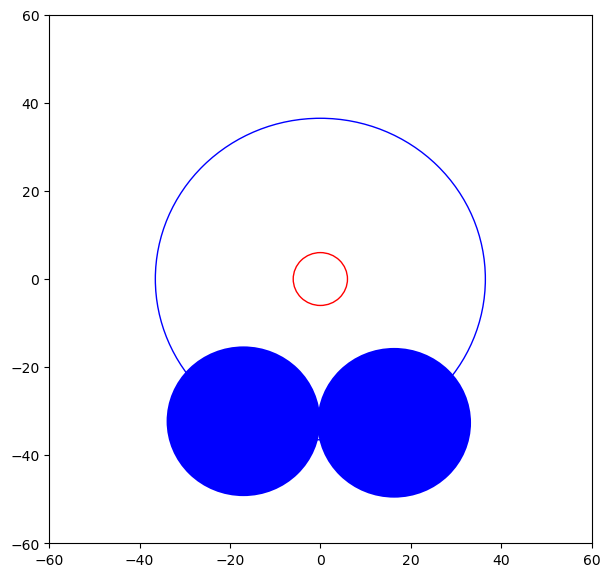

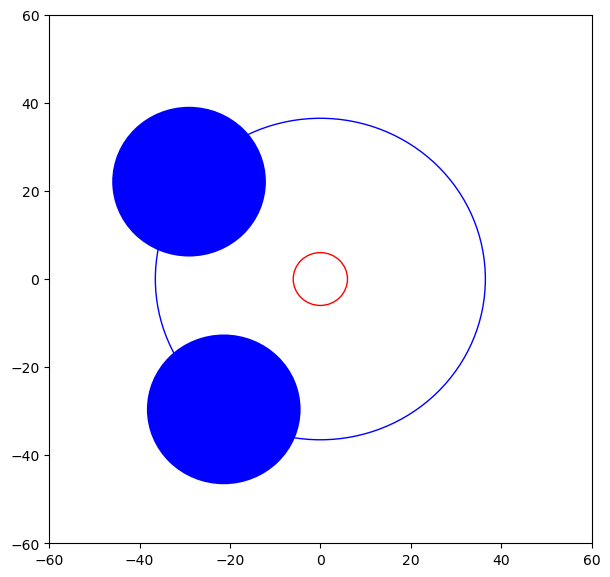

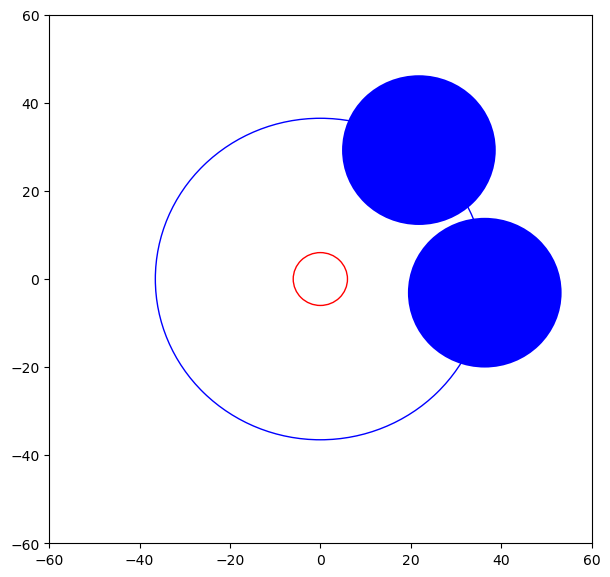

In [28]:
    
# Help from here: https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
for ind, seqid in enumerate(['30001039002', '30001143002', '30201029002']):
    obs = info.Observation(path='../data/', seqid=seqid)
    evfile = obs.science_files['A'][0]
    hdr = getheader(evfile)
    tstart = hdr['DATE-OBS']
    tend = hdr['DATE-END']
    
    orb_phase_start = (((Time(tstart).jd - t0.jd) * u.day) / period).value % 1
    orb_phase_end = (((Time(tend).jd - t0.jd) * u.day) / period).value % 1

 
    fig = plt.figure()
    fig.set_dpi(100)
    fig.set_size_inches(7, 7)
    ax = plt.axes(xlim=(-60, 60), ylim=(-60, 60))
    bh_patch = plt.Circle((0, 0), racc, color='r', fill=False)
    circle = plt.Circle((0, 0), rsep, color='b', fill=False)
    ax.add_patch(circle)

    ax.add_patch(bh_patch)
    r2_patch = plt.Circle((-10, -10), r2, fc = 'b')
    r2_patch.center = phase_to_xy(orb_phase_start*2*np.pi*u.rad)
    ax.add_patch(r2_patch)
    
    r3_patch = plt.Circle((-10, -10), r2, fc = 'b')
    r3_patch.center = phase_to_xy(orb_phase_end*2*np.pi*u.rad)

    ax.add_patch(r3_patch)




    

#     print(f'Epoch {ind+1}, {seqid}')
#     print(f'Observation duration: {tstart} to {tend}')
#     print(f"Clock time: {hdr['ONTIME']:12.8}, Exposure:{hdr['EXPOSURE']:10.8}")
#     print(f'Orbital phases: {orb_phase_start:8.2} to {orb_phase_end:8.2}')
#     print()





    plt.show()

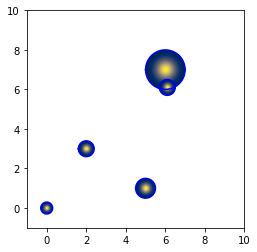

In [22]:
# From https://stackoverflow.com/questions/10958835/matplotlib-color-gradient-in-patches
def gauplot(centers, radiuses, xr=None, yr=None, cmap = plt.cm.cividis, ax = None):
        nx, ny = 1000.,1000.
        xgrid, ygrid = np.mgrid[xr[0]:xr[1]:(xr[1]-xr[0])/nx,yr[0]:yr[1]:(yr[1]-yr[0])/ny]
        im = xgrid*0 + np.nan
        xs = np.array([np.nan])
        ys = np.array([np.nan])
        fis = np.concatenate((np.linspace(-np.pi,np.pi,100), [np.nan]) )
        cmap.set_bad('white')
        thresh = 3
        for curcen,currad in zip(centers,radiuses):
                curim=(((xgrid-curcen[0])**2+(ygrid-curcen[1])**2)**.5)/currad*thresh
                im[curim<thresh]=np.exp(-.5*curim**2)[curim<thresh]
                xs = np.append(xs, curcen[0] + currad * np.cos(fis))
                ys = np.append(ys, curcen[1] + currad * np.sin(fis))
        if ax is None:
            plt.imshow(im.T, cmap=cmap, extent=xr+yr, origin='lower')
            plt.plot(xs, ys, 'b-')
        else:
            ax.imshow(im.T, cmap=cmap, extent=xr+yr, origin='lower')
            ax.plot(xs, ys, 'b-')

gauplot([(0,0), (2,3), (5,1), (6, 7), (6.1, 6.1)], [.3,.4, .5, 1, .4], xr=[-1,10], yr=[-1,10])



0.9228400905171839 0.07383832736013574


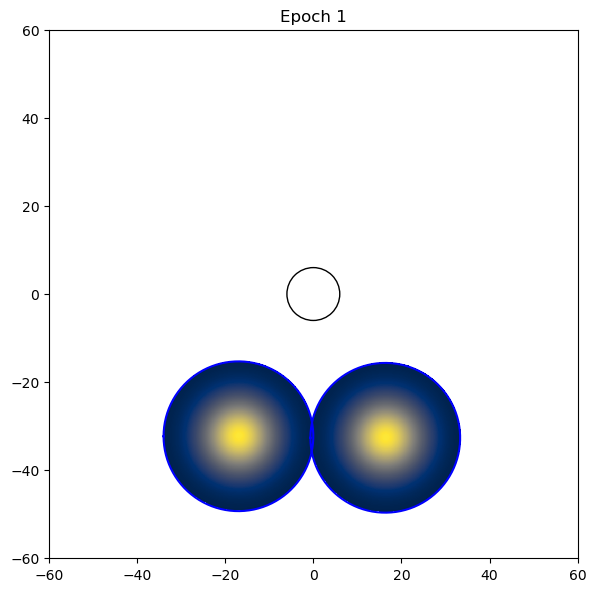

0.6464395586966702 0.9004718866598296


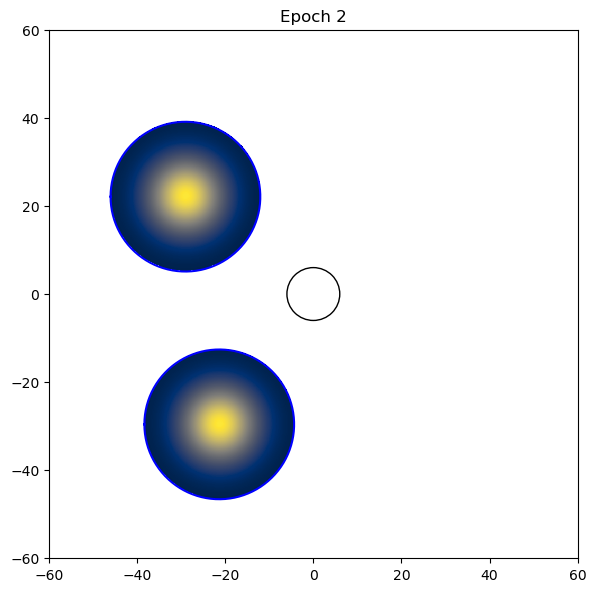

0.23645978089120945 0.39811671688926253


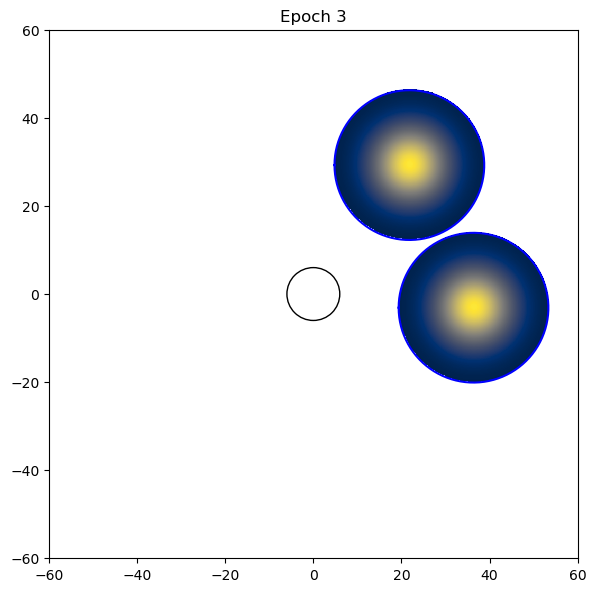

In [30]:
    
# Help from here: https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
for ind, seqid in enumerate(['30001039002', '30001143002', '30201029002']):
    obs = info.Observation(path='../data/', seqid=seqid)
    evfile = obs.science_files['A'][0]
    hdr = getheader(evfile)
    tstart = hdr['DATE-OBS']
    tend = hdr['DATE-END']
    
    orb_phase_start = (((Time(tstart).jd - t0.jd) * u.day) / period).value % 1
    orb_phase_end = (((Time(tend).jd - t0.jd) * u.day) / period).value % 1
    print(orb_phase_start, orb_phase_end)
    
    
    x1, y1 = phase_to_xy(orb_phase_start*2*np.pi*u.rad)
    x2, y2 = phase_to_xy(orb_phase_end*2*np.pi*u.rad)


    
    centers = [(x1, y1), (x2, y2)]
    radii = [r2, r2]
 
    fig = plt.figure()
    fig.set_dpi(100)
    fig.set_size_inches(7, 7)
    ax = plt.axes(xlim=(-60, 60), ylim=(-60, 60))

    
    
    bh_patch = plt.Circle((0, 0), racc, color='black', fill=False)
    circle = plt.Circle((0, 0), rsep, color='b', fill=False)
#    ax.add_patch(circle)

    ax.add_patch(bh_patch)
    gauplot(centers, radii, xr = [-60, 60], yr = [-60, 60], ax=ax)

    ax.set_title(f'Epoch {ind+1}')
    

#     print(f'Epoch {ind+1}, {seqid}')
#     print(f'Observation duration: {tstart} to {tend}')
#     print(f"Clock time: {hdr['ONTIME']:12.8}, Exposure:{hdr['EXPOSURE']:10.8}")
#     print(f'Orbital phases: {orb_phase_start:8.2} to {orb_phase_end:8.2}')
#     print()





    plt.show()

0.9367947908633596 0.9582868732952647


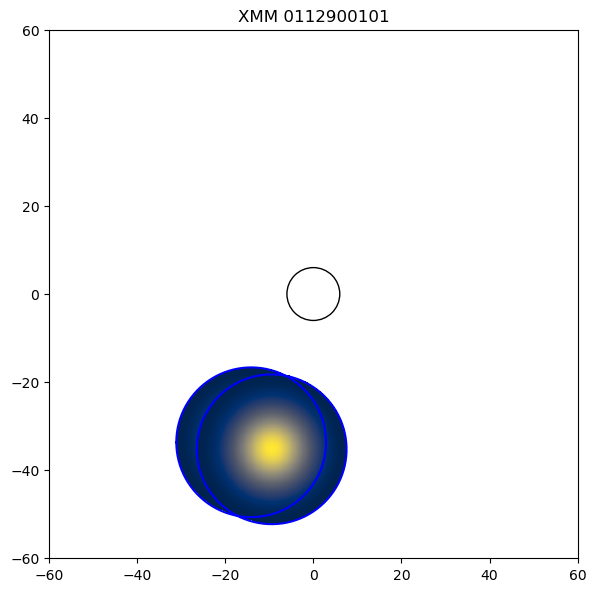

0.46265046296296297
0.17413192486426965 0.2924819742403315


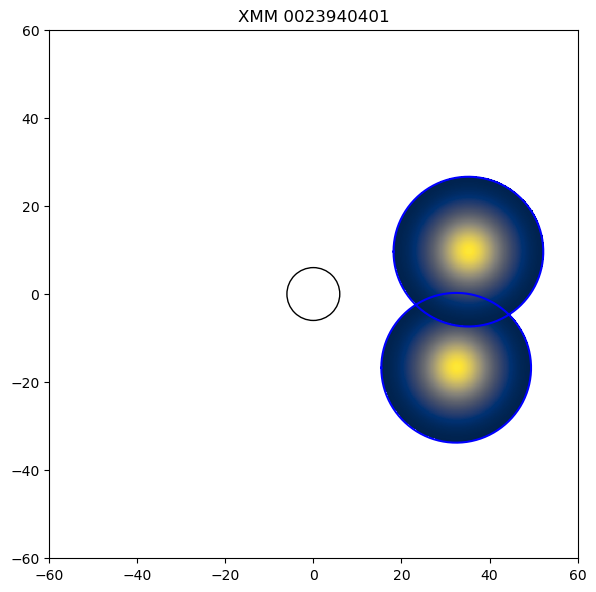

In [73]:
    
# Help from here: https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html

xmm_start = Time('2000-10-21 15:44:41')
xmm_end = Time('2000-10-21 17:45:40')


orb_phase_start = 1.0 - ((np.abs(xmm_start.jd - t0.jd) * u.day) / period).value % 1
orb_phase_end = 1.0 - ((np.abs(xmm_end.jd - t0.jd) * u.day) / period).value % 1

print(orb_phase_start, orb_phase_end)
  
    
    
x1, y1 = phase_to_xy(orb_phase_start*2*np.pi*u.rad)
x2, y2 = phase_to_xy(orb_phase_end*2*np.pi*u.rad)


    
centers = [(x1, y1), (x2, y2)]
radii = [r2, r2]

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 7)
ax = plt.axes(xlim=(-60, 60), ylim=(-60, 60))

    
    
bh_patch = plt.Circle((0, 0), racc, color='black', fill=False)
circle = plt.Circle((0, 0), rsep, color='b', fill=False)

ax.add_patch(bh_patch)
gauplot(centers, radii, xr = [-60, 60], yr = [-60, 60], ax=ax)

ax.set_title(f'XMM 0112900101')
plt.show()



xmm_start = Time('2002-09-26 05:37:34')
xmm_end = Time('2002-09-26 16:43:47')



dt = xmm_end - xmm_start

orb_phase_start = 1.0- ((np.abs(xmm_start.jd - t0.jd) * u.day) / period).value % 1
orb_phase_end = 1.0- ((np.abs(xmm_end.jd - t0.jd) * u.day) / period).value % 1



print(orb_phase_start, orb_phase_end)
    
    
x1, y1 = phase_to_xy(orb_phase_start*2*np.pi*u.rad)
x2, y2 = phase_to_xy(orb_phase_end*2*np.pi*u.rad)


    
centers = [(x1, y1), (x2, y2)]
radii = [r2, r2]

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 7)
ax = plt.axes(xlim=(-60, 60), ylim=(-60, 60))

    
    
bh_patch = plt.Circle((0, 0), racc, color='black', fill=False)
circle = plt.Circle((0, 0), rsep, color='b', fill=False)

ax.add_patch(bh_patch)
gauplot(centers, radii, xr = [-60, 60], yr = [-60, 60], ax=ax)

ax.set_title(f'XMM 0023940401')
plt.show()





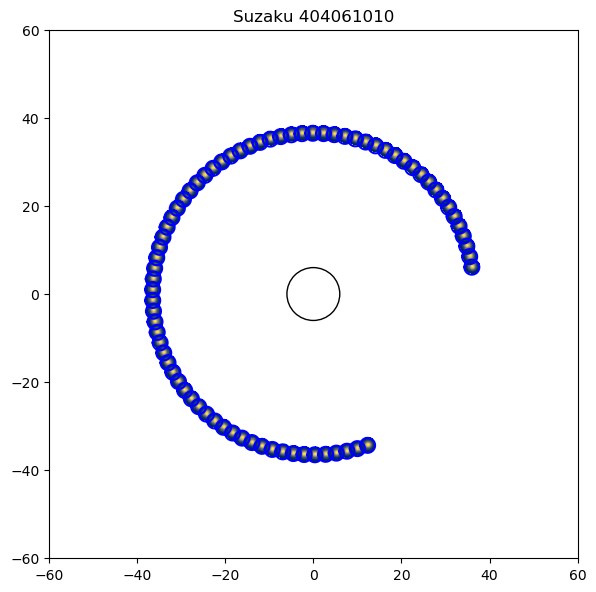

In [72]:
suzaku_start = Time('2009-07-21 18:38:29')
suzaku_end = Time('2009-07-24 21:29:19')

orb_phase_start = ((np.abs(suzaku_start.jd - t0.jd) * u.day) / period).value % 1
orb_phase_end = ((np.abs(suzaku_end.jd - t0.jd) * u.day) / period).value % 1

num_hrs = int((suzaku_end - suzaku_start).to(u.hr).value)
hr_step = np.arange(num_hrs)*u.hr

times = suzaku_start + hr_step
phase = (( (times.jd - t0.jd)*u.day) / period).value % 1

x1, y1 = phase_to_xy(phase*2*np.pi*u.rad)

centers = [ (x, y) for x, y in zip(x1, y1)]
radii = [ r2*0.1 for x in x1]
#centers = [(x1, y1), (x2, y2)]
#radii = [r2, r2]

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 7)
ax = plt.axes(xlim=(-60, 60), ylim=(-60, 60))

    
    
bh_patch = plt.Circle((0, 0), racc, color='black', fill=False)
circle = plt.Circle((0, 0), rsep, color='b', fill=False)

ax.add_patch(bh_patch)
gauplot(centers, radii, xr = [-60, 60], yr = [-60, 60], ax=ax)

ax.set_title(f'Suzaku 404061010')
plt.show()



